# The Dataset

I have chosen the dataset - _District-wise, season-wise crop production statistics from 1997_ from this [link](https://data.gov.in/resources/district-wise-season-wise-crop-production-statistics-1997).

**Description**

The dataset has 2,46,091 rows and consists of state wise, district wise, year wise, season wise, and crop wise data that shows the plantation area of a crop (in Hectares) and the corresponding production of that crop (in Tonnes).
It has five categorical and two numerical attributes, which are as follows:

* `State_Name`, `District_Name` are categorical attributes that denote the name of the states and districts respectively.

* `Crop_Year` is a categorical attribute that denotes the year in which the crop production was recorded.

* `Season` is a categorical attribute that denotes the season in which the crop production was recorded. Kharif and Rabi are examples of such seasons.

* `Crop` is a categorical attribute that denotes the actual name of the crop. For example, Rice, Wheat, Onion, Coconut, are few of the crops that can be found in India.

* `Area` is a continuous attribute that denotes the plantation area of a specific crop in a specific region in Hectares.

* `Production` is a continuous attribute that denotes the actual yield of the crop in Tonnes.


**Purpose of the data**

The data can be used to study and analyze a wide variety of crop production statistics. A few of them are as follows:

1. State-wise / district-wise contribution to the production of a crop in India.

2. Comparing the agroclimatic zone wise production of crops. For example, in which season the best yield of a crop is obtained, and, in which region of India?

3. Studying the crops with the highest yield. If a region is contributing a significant portion to the production, then Iconsider the environmental and socio-economic factors that could have led to good yield (and the factors that might have led to poor yield in some different region).

4. Studying the crop growing patterns, and, the diversification of crops planted in a region can prove beneficial for formulating various crop related schemes and assessing the impacts that they have on their production in different regions.



## Reading and Cleaning the Dataset

In [ ]:
library(ggplot2)
library(dplyr)
install.packages('reshape2')
library(reshape2)
install.packages("corrplot")
library(corrplot)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.90 loaded



In [ ]:
df <- read.csv("https://raw.githubusercontent.com/genericSpecimen/college-work/master/data-mining/R/apy.csv", header=TRUE)

df <- na.omit(df)
# 2015 has incomplete data, so I remove it since otherwise it shows up as outliers
df <- df %>% filter(Crop_Year != 2015)
# Season names have trailing whitespaces, I remove them for convenience
df$Season <- trimws(df$Season, which = c("right"))

head(df)
attach(df)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254,2000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2,1
3,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102,321
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176,641
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720,165
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168,65100000


The following objects are masked from df (pos = 3):

    Area, Crop, Crop_Year, District_Name, Production, Season,
    State_Name


The following objects are masked from df (pos = 4):

    Area, Crop, Crop_Year, District_Name, Production, Season,
    State_Name




# Data Analysis

Let's first try to analyze the numeric attributes, `Area` and `Production`. We will study the mean and the standard deviation of the data, and then see how the values of these attributes are distributed. A boxplot is an ideal way to visualize the distribution of the data.

The data contains values of a lot of variables (state, district, crop, etc), so I need to select a subset of the data for a clearer and more accurate picture. For example, I will select a subset of the data, where the Crop is Banana and, I group this data by the years and summarise it by summing the Area and Production in each year group.

In [ ]:
df_banana_per_year <- df %>% 
                      filter(Crop == "Banana") %>%
                      group_by(Crop_Year) %>%
                      summarise_at(vars(Area, Production), list(sum))
#df_banana_per_year
df_area_prod <- subset(df_banana_per_year , select = -c(Crop_Year))
df_area_prod

Area,Production
<dbl>,<dbl>
216302.0,8577683
191319.0,6246379
237679.0,5784603
299408.0,6614610
208706.0,4212733
299715.0,6371622
367239.0,10951296
284566.5,7779683
348402.8,9755820


## Mean and Standard Deviation

The arithmetic mean is one of the measures of central tendency, and, the standard deviation is used to measure the amount of variation of the data from its mean. Using the R programming language, the mean and standard deviation of the data can be found using the functions `mean` and `sd` respectively.

For the `Area` attribute, the mean value is `291376` Hectares, and the standard deviation is `83308.24`. Since this is a very large value, this means that the values of the `Area` attribute are spread over a large range of values.

Similarly, for the `Production` attribute, the mean value is `8118482` Tonnes and the standard deviation is `3056965`. Again, this means that the values of the `Production` attribute are spread over a large range of values.





In [ ]:
cat("Plantation Area of Banana")
cat("\nMean:", mean(df_banana_per_year$Area))
cat("\nSD:", sd(df_banana_per_year$Area))

cat("\n\nProduction of Banana")
cat("\nMean:", mean(df_banana_per_year$Production))
cat("\nSD:", sd(df_banana_per_year$Production))

Plantation Area of Banana
Mean: 291376
SD: 83308.24

Production of Banana
Mean: 8118482
SD: 3056965

## Five Number Summary

The mean is not a robust statistic, since it's easily influenced by outliers. We turn to a deeper analysis of the distribution of values, and make use of the five number summary of the data and plot the corresponding boxplots.


### Boxplots

The five number summary can be generated by the function `quantile` in `R`.

Note: The `Crop_Year` attribute is a categorical attribute since it denotes discrete years rather than a numerical quanitity. So, it does not make sense to calculate measures like mean, standard deviation, five number summary. Even if the `Crop_Year` shows up in some visualization, Iwill ignore it since it has no meaning.

In [ ]:
cat("----------- Five number summaries -----------\n")
cat("Area\n")
print(quantile(df_banana_per_year$Area))
cat("\nProduction\n")
print(quantile(df_banana_per_year$Production))
cat("---------------------------------------------\n")

----------- Five number summaries -----------
Area
      0%      25%      50%      75%     100% 
128130.0 221646.2 299651.0 355686.6 417226.0 

Production
      0%      25%      50%      75%     100% 
 1754578  6277690  8178683 10773795 12647999 
---------------------------------------------


No id variables; using all as measure variables



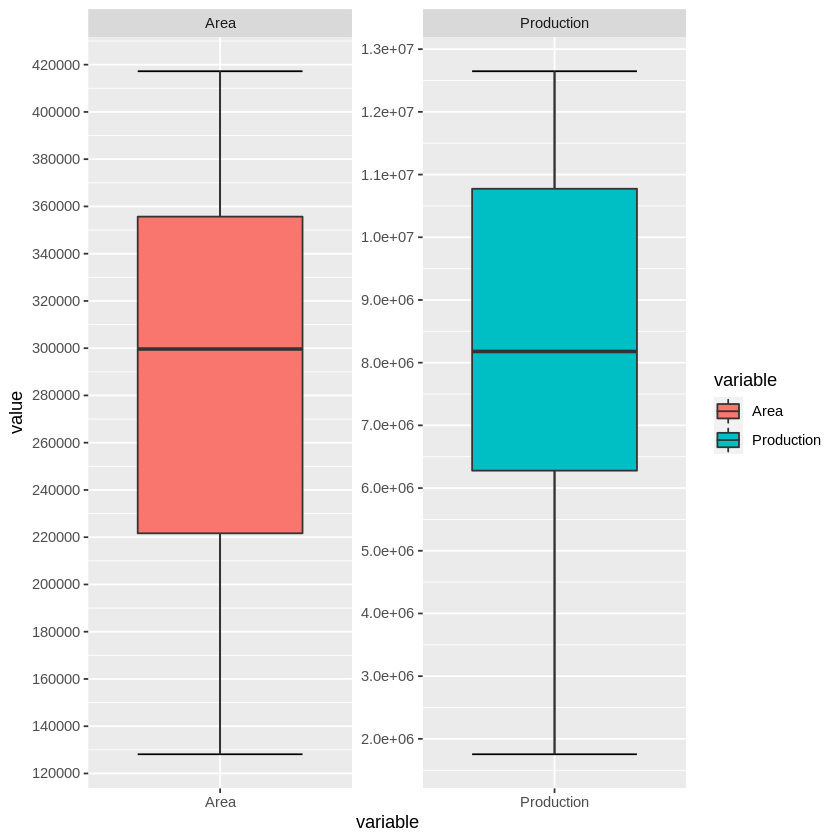

In [ ]:
ggplot(data = melt(df_area_prod), aes(x=variable, y=value)) +
  stat_boxplot(geom='errorbar') +
  geom_boxplot(aes(fill=variable)) +
  scale_y_continuous(breaks = scales::pretty_breaks(n = 14)) +
  facet_wrap( ~ variable, scales="free")

**Interpretation**

The five number summary is a set of five values that denote:
1. Minimum: For the `Area` attribute, the minimum value is `128130` Hectares. This means that 0% of the data falls below this value. Similarly, for the `Production` attribute, 0% of the data falls below the minimum value, `1754578` Tonnes. The minimum corresponds to the horizontal line at the lower end of the bottom whisker in the boxplot.

2. First quartile: 25% of the `Area` values fall below `221646.2` Hectares, and 25% of the `Production` values fall below `6277690` Tonnes. The first quartile corresponds to the lower end of the box in the boxplot. 

3. Second quartile (median): 50% of the `Area` values fall below `299651.0` Hectares, and 50% of the `Production` values fall below `8178683` Tonnes. The median corresponds to the horizontal line in the box in the boxplot.

4. Third quartile: 75% of the `Area` values fall below `355686.6` Hectares, and 75% of the `Production` values fall below `10773795` Tonnes. The third quartile corresponds to the upper end of the box in the boxplot.

5. Maximum: 100% of the `Area` values fall below `417226.0` Hectares, and 100% of the `Production` values fall below `12647999` Tonnes. The maximum corresponds to the horizontal line at the upper end of the upper whisker in the boxplot.


The range (maximum - minimum) and the Interquartile range (third quartile - first quartile) can be found using the R functions  `diff(range())` and `IQR()` respectively. They are as follows:

In [ ]:
cat("----------- Range, IQR -----------\n")
cat("Area")
cat("\nRange: ", diff(range(df_banana_per_year$Area)))
cat("\nIQR: ", IQR(df_banana_per_year$Area))
cat("\n\nProduction")
cat("\nRange: ", diff(range(df_banana_per_year$Production)))
cat("\nIQR: ", IQR(df_banana_per_year$Production))
cat("\n----------------------------------\n")

----------- Range, IQR -----------
Area
Range:  289096
IQR:  134040.4

Production
Range:  10893421
IQR:  4496105
----------------------------------


## Distribution of the Production of a Crop across the States

To get an overall idea of the state-wise production of the Banana crop, I can study how many states produce the crop within a specific interval of production values. This helps us to know, for example, how many states produce a "low" yield of Banana, how many states produce a "medium" yield of Banana, and how many states produce a "high" yield of banana, depending on how I define "low", "medium", and "high".


### Histogram
A histogram is an ideal way to plot the frequency counts of states that produce the crop within each interval of production values. We divide the Production values into "bins" and count how many states fall into each bin.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



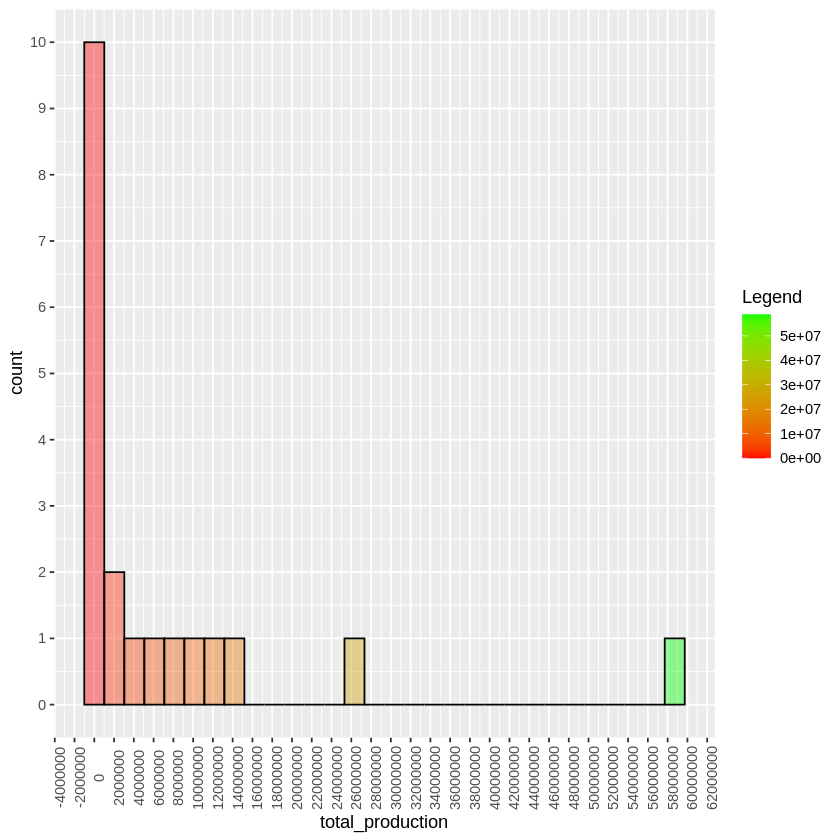

In [ ]:
df_banana_per_state <- df %>%
  filter(Crop == "Banana") %>%
  group_by(State_Name) %>%
  summarise(total_production = sum(Production))
#df_banana_per_state
ggplot(df_banana_per_state[,2], aes(x = total_production, fill=..x..)) +
    geom_histogram(alpha=0.4, colour="black") +
    scale_fill_gradient("Legend", low="red", high="green") +
    scale_x_continuous(breaks = scales::pretty_breaks(n = 30)) +
    scale_y_continuous(breaks = scales::pretty_breaks(n = 10)) +
    theme(axis.text.x = element_text(angle=90))

From the histogram, Ican see that the data is skewed right. Most of the states (10 states) produce "low" quantities of banana as compared to the other states. A few states produce "medium" amounts of banana, and,
only one state produces significantly large quantities of banana in all of India.

## Correlation of Area and Production

Correlation measures the degree to which two variables are related to each other. Here, Istudy whether `Area` and `Production` have any sort of correlation.

We can simply pass our dataframe to the `cor` function to calculate pairwise correlation for each numeric attribute. We can visualize the same correlation matrix using the `corrplot` package.

In [ ]:
cor(df_area_prod)

,Area,Production
Area,1.000000,0.912742
Production,0.912742,1.000000


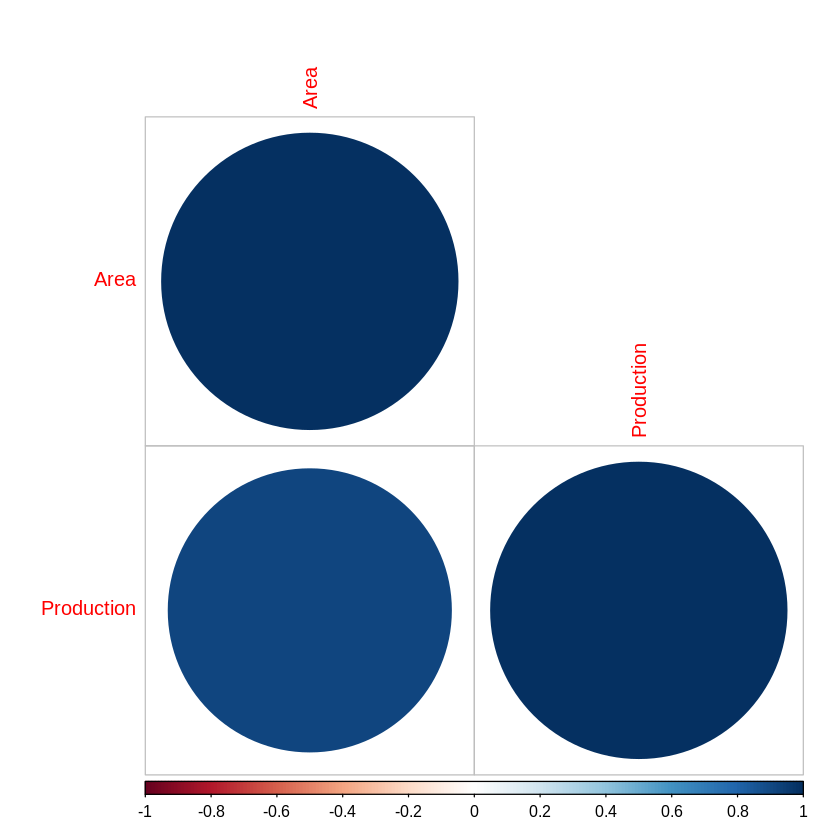

In [ ]:
ap <- cor(df_area_prod)
corrplot(ap, type="lower", order="hclust")

There's a strong positive correlation (`0.91`) between the `Area` and `Production` attributes, which is understandable since a larger plantation (usually) means a higher yield.

We can visualize this correlation easily using a scatter plot.



### Scatter Plot

The scatter plot of Area and Production values of the Banana crop clearly shows us the positive linear correlation between Area and Production as an upward rising trend. As the plantation area increases, the corresponding crop yield also increases.

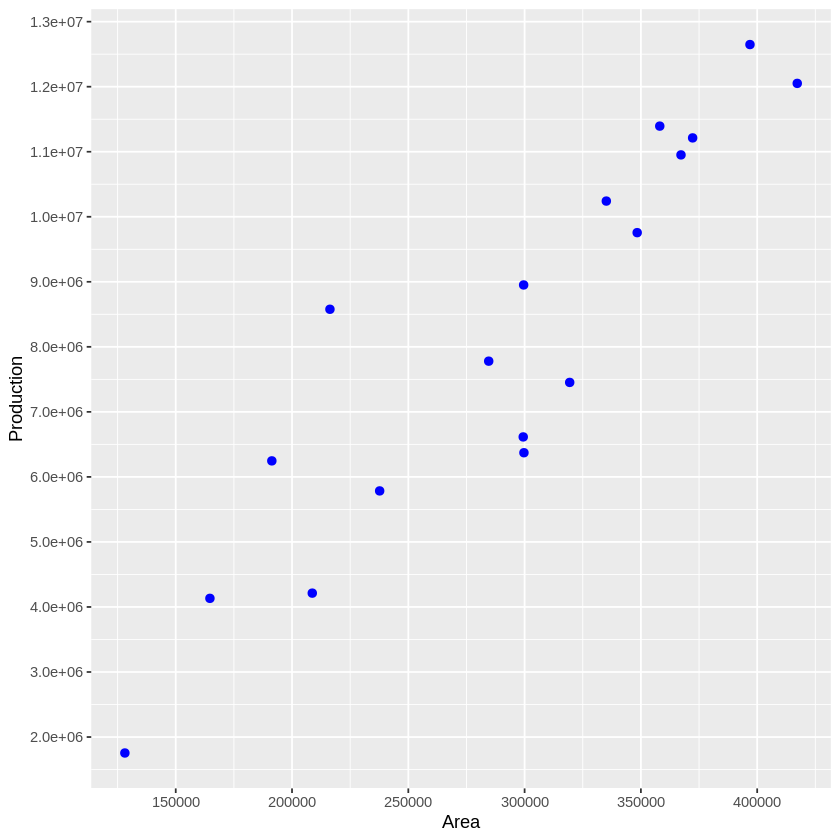

In [ ]:
ggplot(df_banana_per_year, aes(x=Area, y=Production)) +
  geom_point(size=2, color="blue") +
  scale_x_continuous(breaks = scales::pretty_breaks(n = 6)) +
  scale_y_continuous(breaks = scales::pretty_breaks(n = 10))

### Line Plot

Another way to visualize the correlation is to plot a line chart for the Area and Production of Banana over the years 1997-2014.

This could be done in a single chart, but due to the vastly different scales of values, the Area would show up as an uninteresting line in the bottom of the chart.

Instead, I plot separate charts.

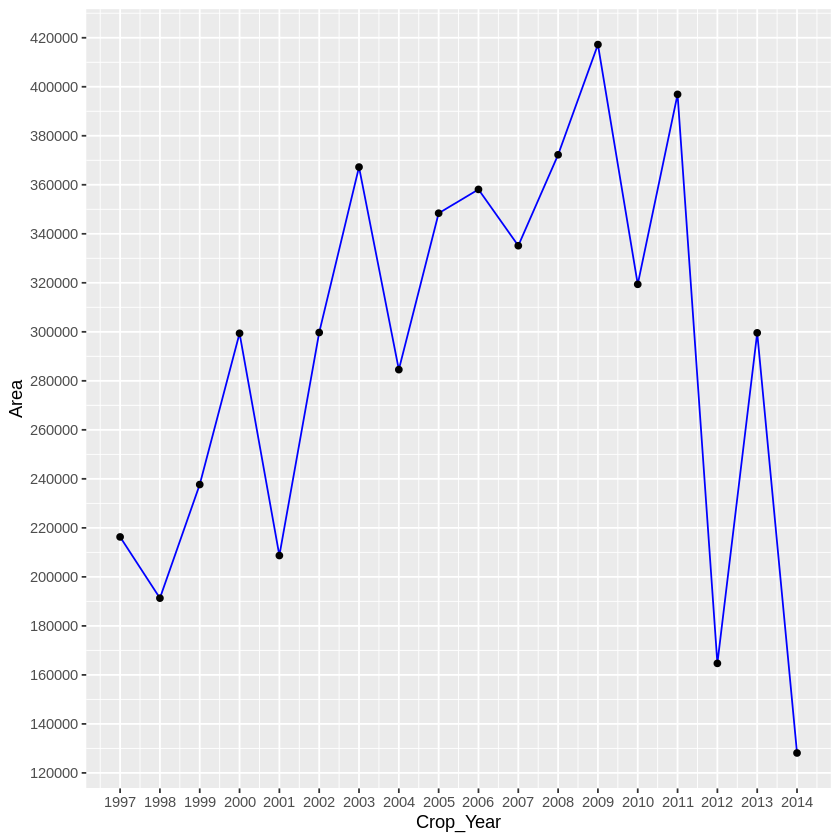

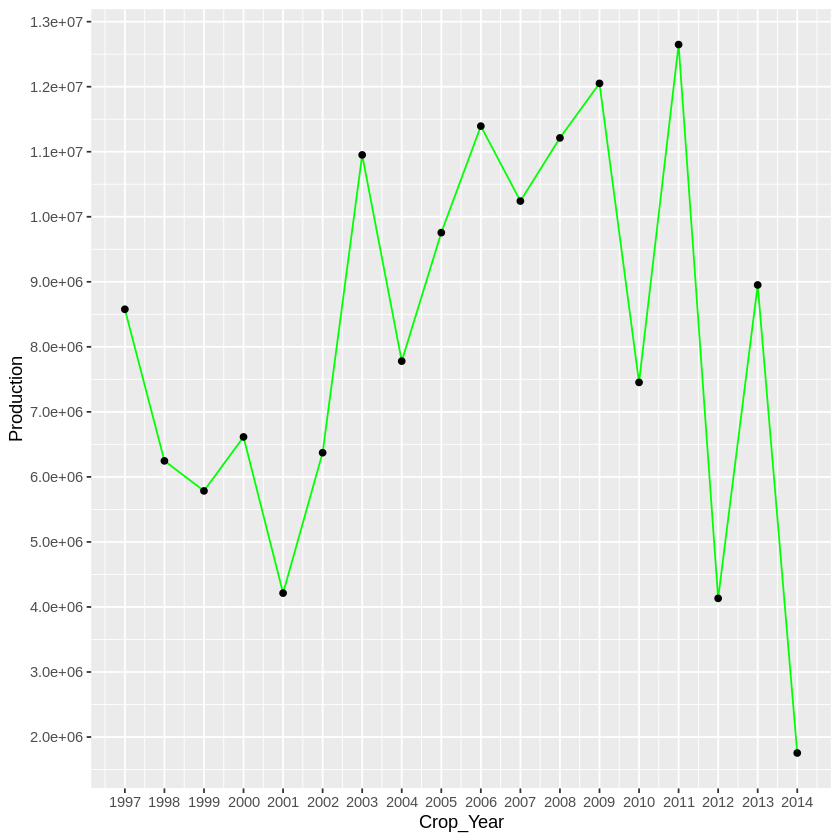

In [ ]:
ggplot(data = df_banana_per_year, aes(x=Crop_Year, y=Area)) +
  geom_line(color="blue") +
  geom_point() +
  scale_x_continuous(breaks = scales::pretty_breaks(n = 14)) +
  scale_y_continuous(breaks = scales::pretty_breaks(n = 14))

ggplot(data = df_banana_per_year, aes(x=Crop_Year, y=Production)) +
  geom_line(color="green") +
  geom_point() +
  scale_x_continuous(breaks = scales::pretty_breaks(n = 14)) +
  scale_y_continuous(breaks = scales::pretty_breaks(n = 14))


Again, I can see the similar trends between their values in the two charts. For example, in the years 2004 and 2010, there was a sharp decline in plantation area. If Isee the production in those years, I can see the same sharp decline.

Similarly, in the year 2003 and 2011, there was a sharp increase in the plantation area as well as the production.

## State-wise Top Producers of a Crop

We can study which are the states that produced the highest yield of Banana in a specific year, like 2014. The visualization of this can be accomplished using a pie chart or a bar chart.

For this purpose, Ihave filtered those rows which contains the crop 'Banana' and where the crop year is 2014. After that, Ihave made groups on the basis of state name and then added all the productions belonging to a state. 

So finally, Ihave the total production of banana in the year 2014 for each state. 

### Pie Chart

We now plot the pie chart which shows the production of Banana in the year 2014 in different states.


In [ ]:
df_banana_2014_per_state <- df %>% filter(Crop == "Banana", Crop_Year == 2014) %>%
                            group_by(State_Name) %>%
                            summarise(total_production = sum(Production)) %>%
                            mutate(prop = round(total_production*100/sum(total_production), 2)) %>%
                            arrange(desc(prop))
#df_banana_2014_per_state

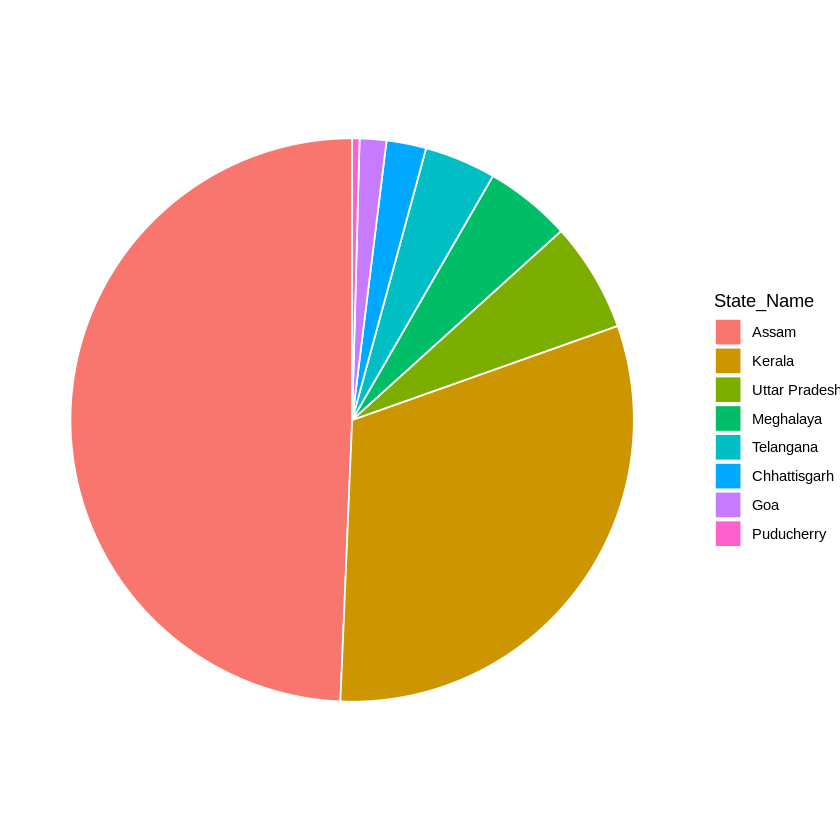

In [ ]:
ggplot(df_banana_2014_per_state, aes(x="", y=prop, fill=reorder(State_Name, -total_production))) +
  geom_col(width=1, color="white") +
  coord_polar("y") +
  theme_void() + # remove background, grid, numeric labels
  guides(fill=guide_legend(title="State_Name"))

The pie chart shows the contribution of the top eight states in the production of Banana in the year 2014. 

It is evident from the pie chart that Assam is the top producer of Banana in the year 2014, followed by Kerala and U.P.

Almost half of the total production of Banana in the year 2014 is in Assam!

### Bar Chart

We can also plot a bar chart to show the production of banana in the year 2014 in different states.

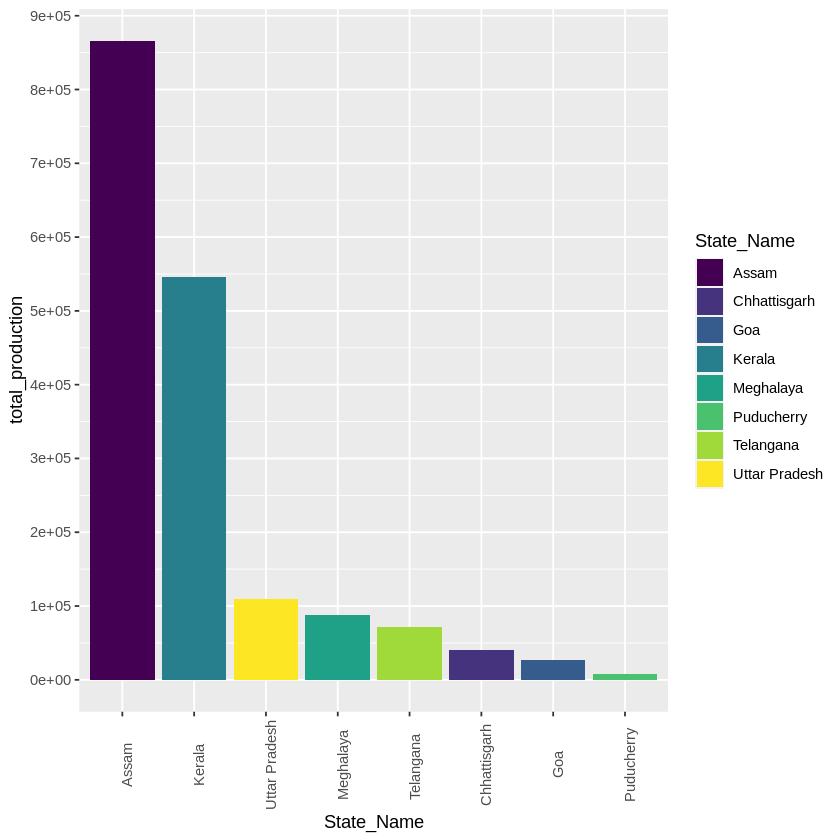

In [ ]:
ggplot( data=df_banana_2014_per_state,
        aes(x = reorder(State_Name, -total_production),
        y = total_production,
        fill = State_Name)) +
  geom_col() +
  scale_y_continuous(breaks = scales::pretty_breaks(n = 10)) +
  theme(axis.text.x = element_text(angle=90)) +
  labs(x = "State_Name") +
  scale_fill_viridis_d()

Again, we can see that Assam is the top producer of Banana in the year 2014, followed by Kerala. The additional information that we get in bar chart is the production value for all the states which was missing in the case of Pie chart.

## Top Five Produced Crops

In order to find the most produced crops in India, I have first grouped the data on the basis of `Crop` and then calculated the total production of each crop by simpling adding the production values in each group.

After that we are left with `Crop` and their corresponding `total_production`. Then, I have selected 5 crops with the maximum production using `slice_max`.

In [ ]:
df_most_produced_crops <- df %>%
                          group_by(Crop) %>%
                          summarise(total_production = sum(Production)) %>%
                          slice_max(total_production, n = 5)
df_most_produced_crops

Crop,total_production
<chr>,<dbl>
Coconut,129981629216
Sugarcane,5535104369
Rice,1599576696
Wheat,1332824816
Potato,424769110


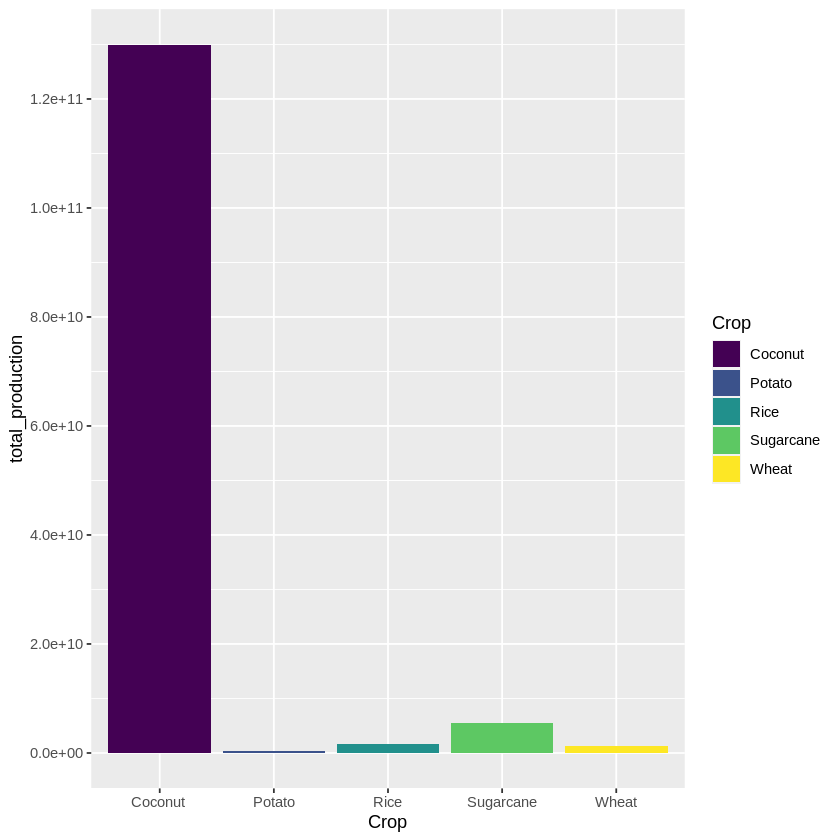

In [ ]:
ggplot(df_most_produced_crops, aes(x = Crop, y = total_production, fill=Crop)) + 
  scale_y_continuous(breaks = scales::pretty_breaks(n = 10)) +
  geom_col() +
  scale_fill_viridis_d()

It is very clear from the above bar chart that `Coconut` is the most produced crop over all the years. In fact, the production of Coconut is so high that the production of other crops look almost negligible in comparison to Coconut.

The next crop with the highest production is Sugarcane, followed by Rice, Wheat, and Potato.


## Production of a Crop in Different Seasons

To find the production of, say, the Rice crop in different seasons, I have selected only those rows containing `Crop == Rice`. After that, I have grouped the data on the basis of `Season` and added the production values in each group.

So finally, I have the total production of rice in each season.

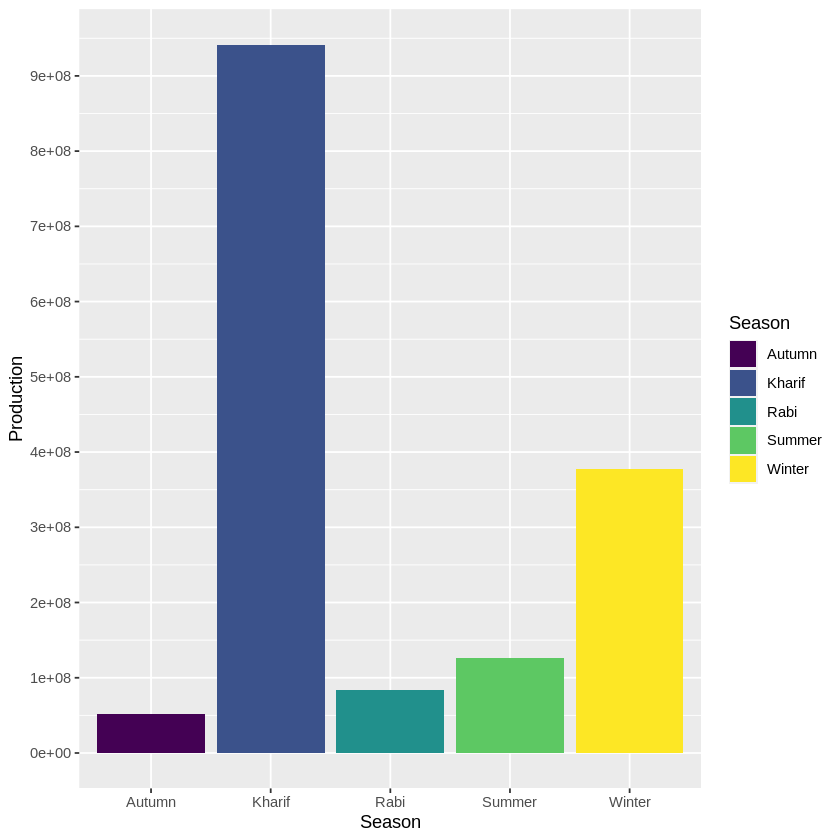

In [ ]:
df_rice_per_season =  df %>% filter(Crop == "Rice", Season != "Whole Year") %>%
                      group_by(Season) %>%
                      summarise(Production = sum(Production))
# df_rice_per_season

ggplot(df_rice_per_season, aes(x = Season, y = Production, fill = Season)) + 
  scale_y_continuous(breaks = scales::pretty_breaks(n = 10)) +
  geom_col() +
  scale_fill_viridis_d()

From the above bar chart, it can be seen that production of Rice is at its peak in the `Kharif` season followed by the `Winter` season.The production in the `Kharif` season is enormous as compared to the other seasons. From this data, Ican infer that the best time to plant the rice crop is in the `Kharif` season.

## Production of Two Crops over the years

We can study the comparison of production of any two crops, say, Rice and Wheat, and gather any useful insights. Bar charts and line plots would be a natural way to compare the production.

### Bar chart

To compare the production of `Rice` and `Wheat` over the years, I have made two dataframes, one for Rice and other for Wheat which contains the total production of the crop in every year. I have plotted the production of `Rice` and `Wheat` in the same graph for a more intuitive comparison.

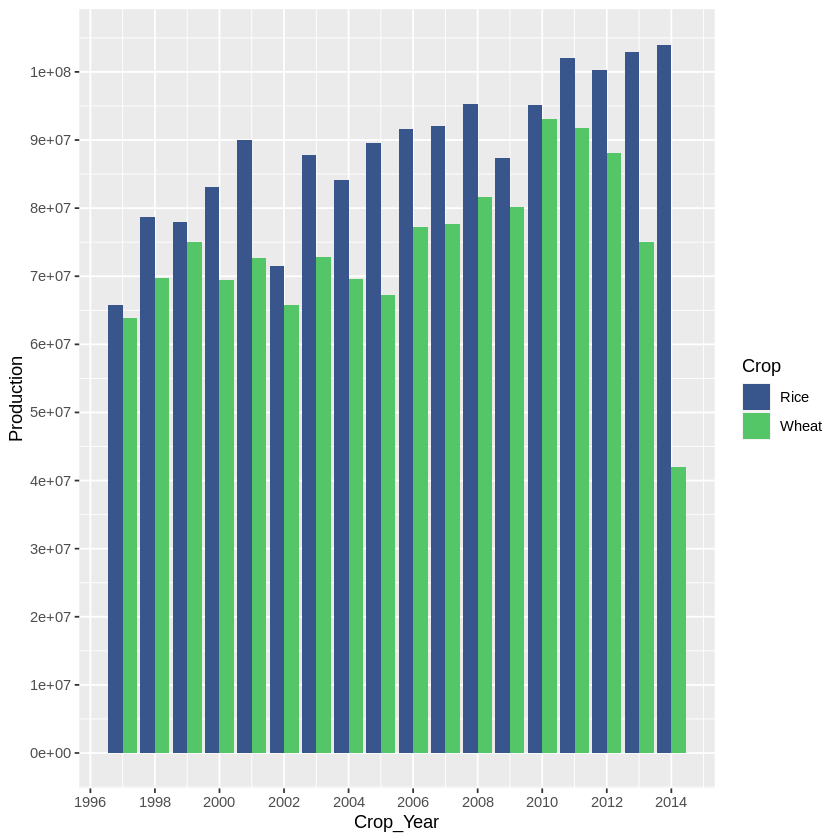

In [ ]:
df_wheat_per_year = filter(df, Crop == "Wheat") %>%
                    group_by(Crop_Year) %>%
                    summarise(Production = sum(Production)) %>%
                    mutate(Crop = "Wheat")

df_rice_per_year =  filter(df, Crop == "Rice") %>%
                    group_by(Crop_Year) %>%
                    summarise(Production = sum(Production)) %>%
                    mutate(Crop = "Rice")

df_rice_wheat_per_year = rbind(df_wheat_per_year, df_rice_per_year)
ggplot(df_rice_wheat_per_year, aes(fill=Crop, y=Production, x=Crop_Year)) + 
    geom_bar(position="dodge", stat="identity") +
    scale_x_continuous(breaks = scales::pretty_breaks(n = 14)) +
    scale_y_continuous(breaks = scales::pretty_breaks(n = 14)) +
    scale_fill_manual(values=c("#39568CFF", "#55C667FF"))


From the above plot, it can be noted that the production of `Rice` is always greater than that of `Wheat`.

One more thing that can be seen is that the production of rice is very less in comparison to that of wheat in the year 2014 considering all the years.

### Line Chart

We can perform the same comparison using a line chart as well.

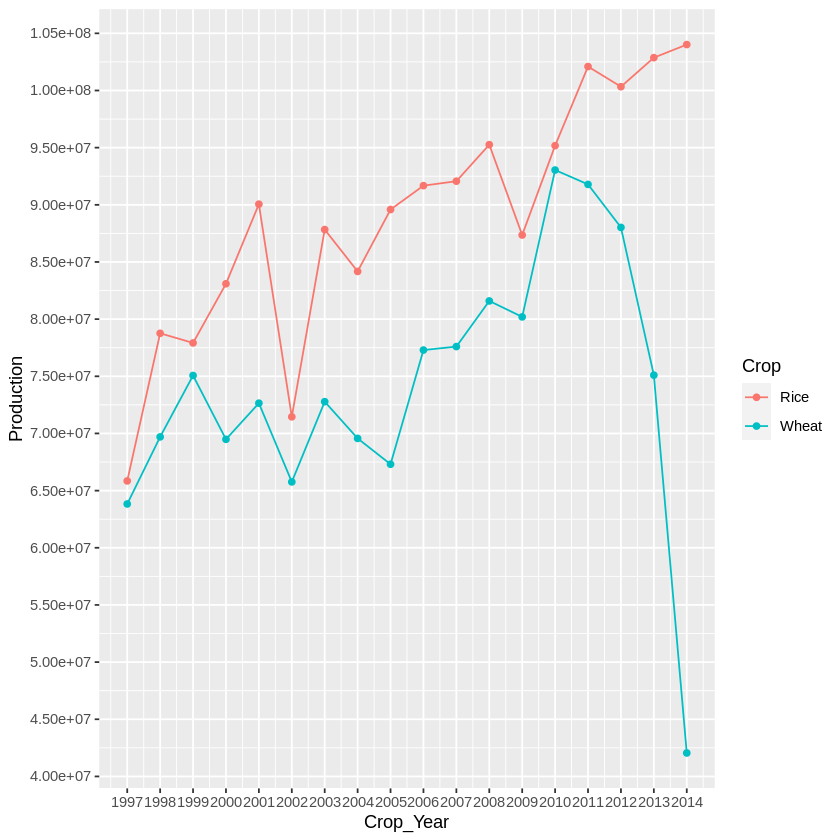

In [ ]:
ggplot(data = df_rice_wheat_per_year, aes(x = Crop_Year, y = Production, col = Crop)) +
          geom_point() +
          geom_line() +
          scale_x_continuous(breaks = scales::pretty_breaks(n = 14)) +
          scale_y_continuous(breaks = scales::pretty_breaks(n = 14))

Again, from the above plot, it can be seen that the line graph of Rice is always above the line graph of Wheat. This is a clear indication that the production of Rice is greater than that of Wheat over years 1997-2014.


The difference in the production of Rice and Wheat is very less in the year 1997 and 2010 and maximum in the year 2014. In fact, there is a huge decline in the production of wheat in the year 2014(which may be due to lack of data for the year 2014).